In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Trabalho Desenvolvido por: Bruno D'Angelo Silva e Ezequiel Guedes Limas Junior

In [13]:
# Carrega o conjunto de dados em um DataFrame
df = pd.read_csv("/content/CA-2023.01.csv", on_bad_lines='skip', encoding='latin-1', delimiter=';', low_memory=False)


In [14]:
# Verifique se há valores ausentes
df.isnull().sum()


ï»¿Regiao - Sigla         0
Estado - Sigla            0
Municipio                 0
Revenda                   0
CNPJ da Revenda           0
Nome da Rua               0
Numero Rua              107
Complemento          333000
Bairro                  828
Cep                       0
Produto                   0
Data da Coleta            0
Valor de Venda            0
Valor de Compra      431576
Unidade de Medida         0
Bandeira                  0
dtype: int64

In [17]:
# Substitui vírgulas por pontos na coluna 'Valor de Venda'
df['Valor de Venda'] = df['Valor de Venda'].str.replace(',', '.', regex=True)

# Em seguida, converte a coluna para um tipo numérico (float)
df['Valor de Venda'] = df['Valor de Venda'].astype(float)

# Calculo da media por estado
estado_precos = df.groupby('Estado - Sigla')['Valor de Venda'].mean().reset_index()


In [19]:
# Ordenação dos estados por preço médio de venda do maior para o menor
estado_precos = estado_precos.sort_values(by='Valor de Venda', ascending=False)

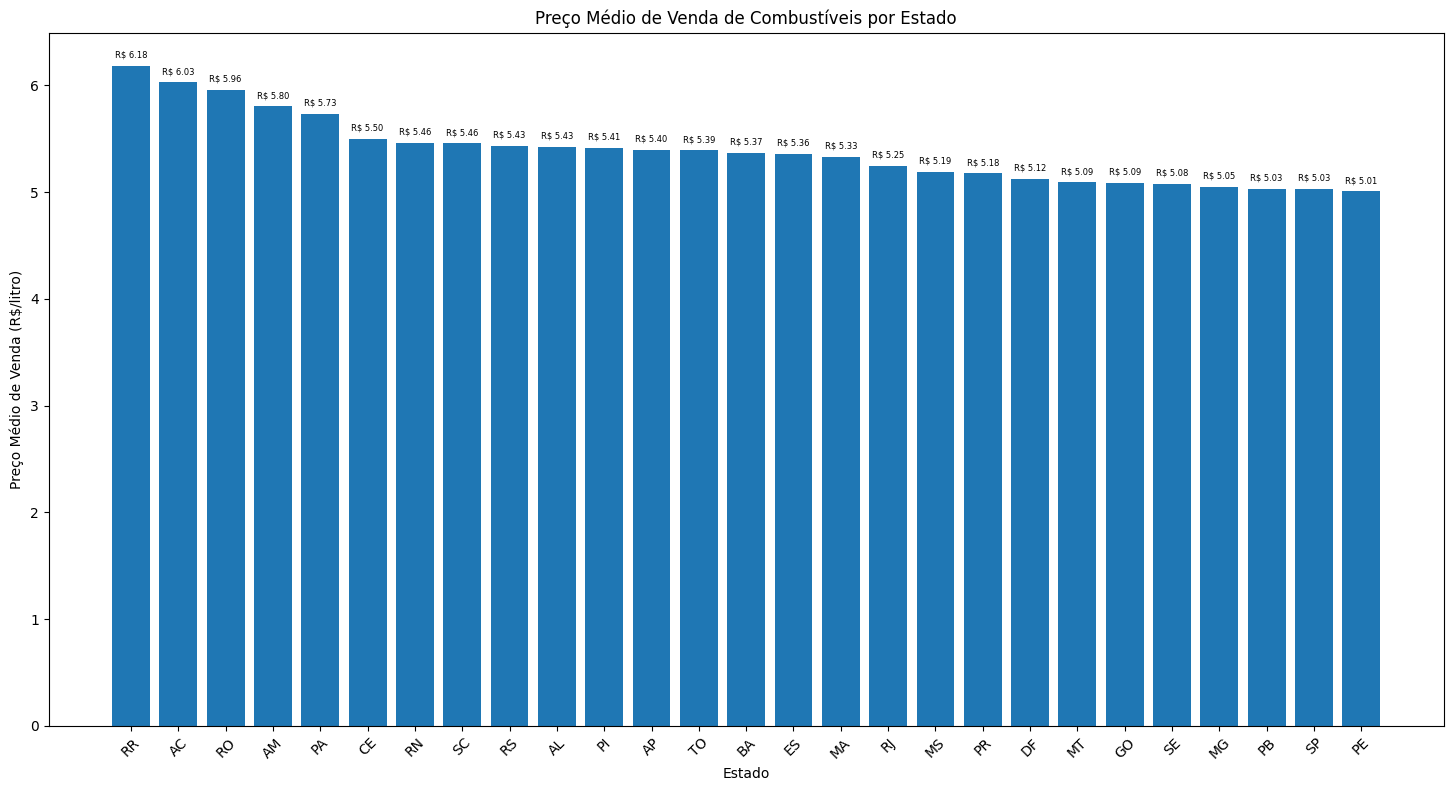

In [76]:
# Plota o gráfico de barras
plt.figure(figsize=(18, 9))
bars = plt.bar(estado_precos['Estado - Sigla'], estado_precos['Valor de Venda'])
plt.xlabel('Estado')
plt.ylabel('Preço Médio de Venda (R$/litro)')
plt.title('Preço Médio de Venda de Combustíveis por Estado')
plt.xticks(rotation=45)

# Ajusta os valores sobre as barras, alinhados à esquerda e com altura ajustada
for bar, value in zip(bars, estado_precos['Valor de Venda']):
    # Ajuste a altura do texto com base no valor da barra
    text_height = value + 0.10
    plt.text(bar.get_x() + bar.get_width() / 2, text_height, 'R$ {:.2f}'.format(value), ha='center', va='center', fontsize=6)

plt.show()

In [62]:
# Calcula a media por fornecedor
bandeira_precos = df.groupby('Bandeira')['Valor de Venda'].mean().reset_index()

In [68]:
# Ordena a bandeira por preço médio de venda do maior para o menor
bandeira_precos = bandeira_precos.sort_values(by='Valor de Venda', ascending=False)
#Seleciona somente os 10 primeiros
bandeira_precos = bandeira_precos.head(10)

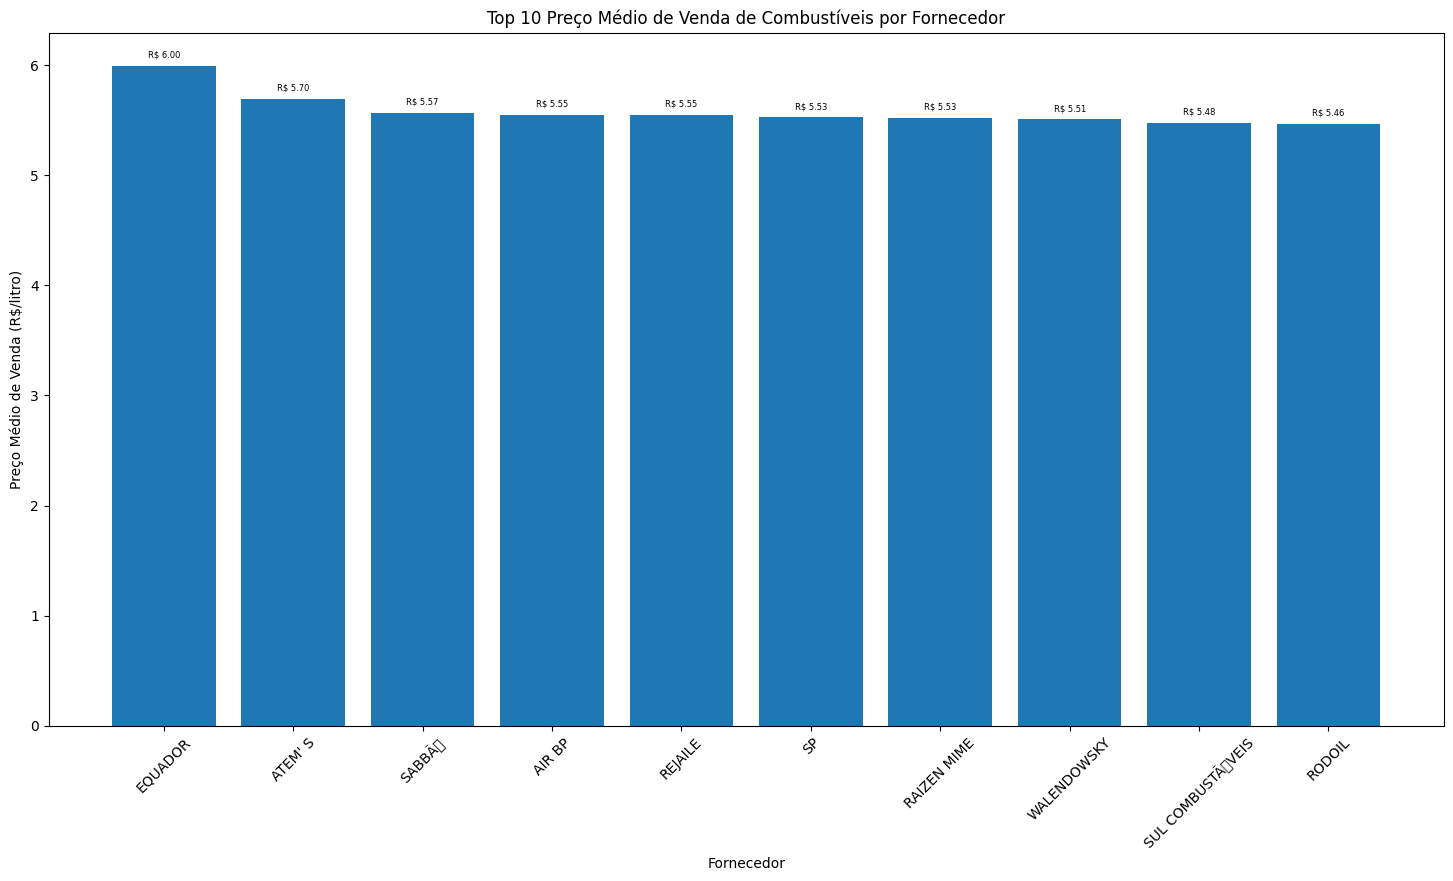

In [77]:
# Plote um novo gráfico de barras
plt.figure(figsize=(18, 9))
bars = plt.bar(bandeira_precos['Bandeira'], bandeira_precos['Valor de Venda'])
plt.xlabel('Fornecedor')
plt.ylabel('Preço Médio de Venda (R$/litro)')
plt.title('Top 10 Preço Médio de Venda de Combustíveis por Fornecedor')
plt.xticks(rotation=45)

# Adiciona os valores sobre as barras, alinhados à esquerda e com altura ajustada
for bar, value, label in zip(bars, bandeira_precos['Valor de Venda'], bandeira_precos['Bandeira']):
    # Ajuste a altura do texto com base no valor da barra
    text_height = value + 0.10
    plt.text(bar.get_x() + bar.get_width() / 2, text_height, 'R$ {:.2f}'.format(value), ha='center', va='center', fontsize=6)
    plt.xticks(rotation=45)
plt.show()
